# Project 1 - NFL Analysis

In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [15]:
df = pd.read_csv('team_stats_2003_2023.csv')
df

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2023,Carolina Panthers,2,15,0.118,236,416,-180,-10.6,17,...,7,4.0,111,103,845,36,25.0,11.1,-135.03,NaN
668,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,17,...,27,4.8,147,101,933,29,45.3,10.1,231.48,NaN
669,2023,Los Angeles Rams,10,7,0.588,404,377,27,1.6,17,...,18,4.3,110,89,720,35,41.1,9.2,133.32,NaN
670,2023,Seattle Seahawks,9,8,0.529,364,402,-38,-2.2,17,...,11,4.1,93,111,954,35,38.8,8.4,62.33,NaN


## Pre-processing

In [24]:
df.shape

(672, 35)

In [26]:
df.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties'],
      dtype='object')

In [28]:
df.isnull().sum() #check for nulls

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64

In [30]:
df['mov'] = df['mov'].fillna(df['points_diff']/df['g']) #filling null values for margin of victory with correct values

In [32]:
df['ties'] = df['ties'].fillna(0) #filling null values for ties with 0

In [34]:
df.isnull().sum() #no more nulls

year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
dtype: int64

In [38]:
duplicates = df[df.duplicated()] #check for duplicates
duplicates #no duplicates

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties


## Visualizations

## Here I decided that win loss percentage was the best measure of succes for a team

### So firstly I sort factors by correlation to win loss percentage to isolate important factors

In [96]:
win_loss_corr = correlation_matrix[['win_loss_perc']].sort_values(by='win_loss_perc', ascending=False)
print(win_loss_corr)

                      win_loss_perc
win_loss_perc              1.000000
wins                       0.997819
mov                        0.910882
points_diff                0.910190
points                     0.748978
score_pct                  0.678728
pass_net_yds_per_att       0.617113
total_yards                0.539483
yds_per_play_offense       0.533387
pass_td                    0.529191
first_down                 0.513363
exp_pts_tot                0.493357
rush_td                    0.489719
rush_att                   0.422432
rush_fd                    0.402489
pass_yds                   0.359698
rush_yds                   0.339630
pass_fd                    0.332350
plays_offense              0.238890
pass_cmp                   0.142976
pen_fd                     0.134703
rush_yds_per_att           0.119451
year                       0.000164
g                         -0.012425
ties                      -0.058942
penalties_yds             -0.064423
pass_att                  -0

## Correlation Matrix based on most relevant factors

<Axes: >

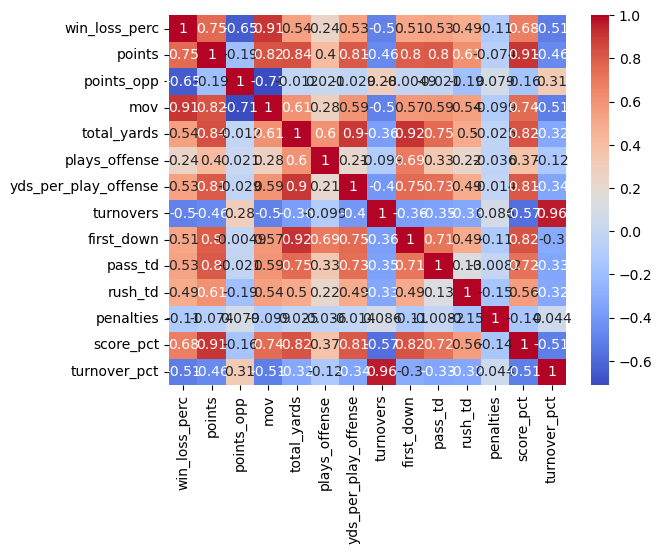

In [98]:
relevant_columns = ['win_loss_perc', 'points', 'points_opp', 'mov', 'total_yards', 'plays_offense', 'yds_per_play_offense', 'turnovers', 'first_down', 'pass_td', 'rush_td', 'penalties', 'score_pct', 'turnover_pct']
relevant_df = df[relevant_columns]
relevant_correlation_matrix = relevant_df.corr()
sns.heatmap(relevant_correlation_matrix, annot=True, cmap='coolwarm')

## Shows that most strongly correlated factors are points for and points against which I prove with the 2 following scatterplots

<Axes: xlabel='points', ylabel='win_loss_perc'>

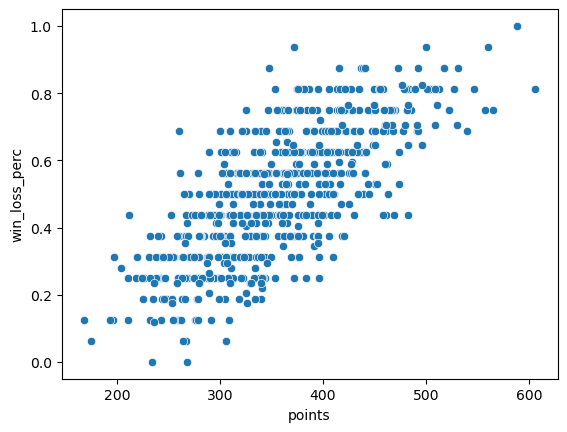

In [169]:
sns.scatterplot(x='points', y='win_loss_perc', data=df)

<Axes: xlabel='points_opp', ylabel='win_loss_perc'>

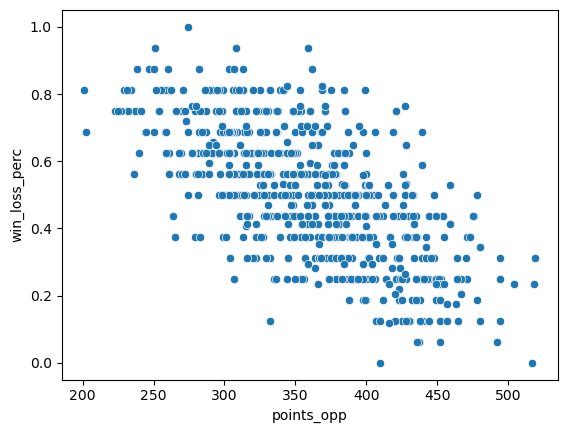

In [162]:
sns.scatterplot(x='points_opp', y='win_loss_perc', data=df)

<Axes: xlabel='points', ylabel='points_opp'>

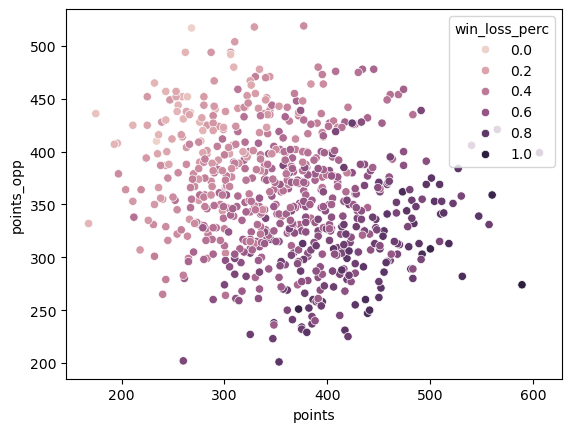

In [160]:
sns.scatterplot(x='points', y='points_opp', hue='win_loss_perc', data=df)

## The previous findings seem obvious so i jump into strongly correlated features not related to scoring

### The following scatterplot shows the clear correlation between pass yards per attemmpt and win loss percentage

<Axes: xlabel='pass_net_yds_per_att', ylabel='win_loss_perc'>

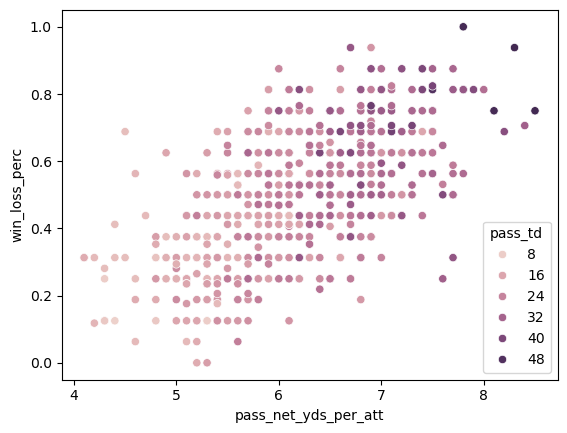

In [124]:
sns.scatterplot(x='pass_net_yds_per_att', y='win_loss_perc', hue='pass_td', data=df)

### While the next scatterplot shows almost no correlation between run yards per attemmpt and win loss percentage

<Axes: xlabel='rush_yds_per_att', ylabel='win_loss_perc'>

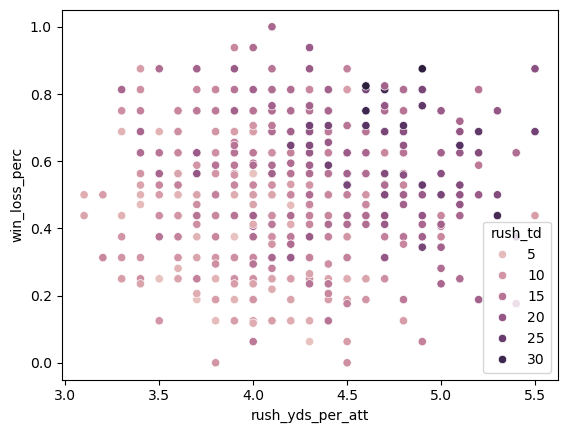

In [126]:
sns.scatterplot(x='rush_yds_per_att', y='win_loss_perc', hue='rush_td', data=df)

<Axes: xlabel='rush_att', ylabel='pass_att'>

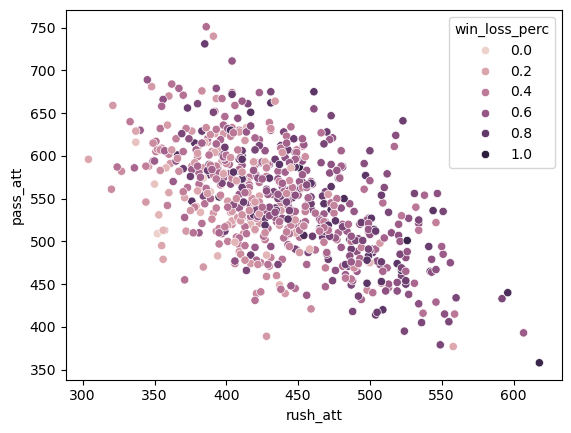

In [148]:
sns.scatterplot(x='rush_att', y='pass_att', hue='win_loss_perc', data=df)